Lasso Train Metrics:
MAE: 5.03
MSE: 40.16
RMSE: 6.34
R2 Score: 0.14

Lasso Test Metrics:
MAE: 5.08
MSE: 41.61
RMSE: 6.45
R2 Score: 0.13

Ridge Train Metrics:
MAE: 4.69
MSE: 35.56
RMSE: 5.96
R2 Score: 0.24

Ridge Test Metrics:
MAE: 5.24
MSE: 44.75
RMSE: 6.69
RMSE: 0.07
RidgeCV:[-0.1351134   0.06426264  0.00381603  0.02955621 -0.04147592]
LassoCV:[-0.02319169  0.14011807  0.06630961  0.10836854  0.08270914]


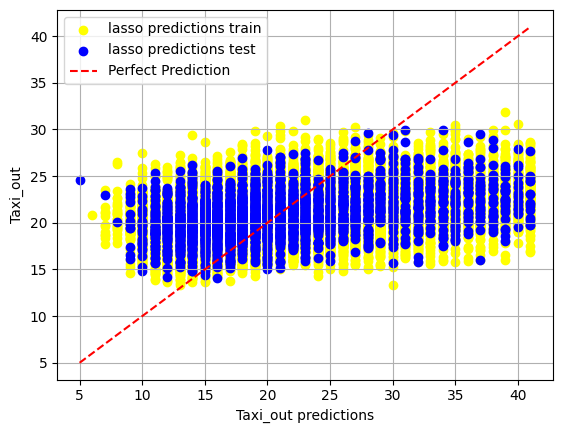

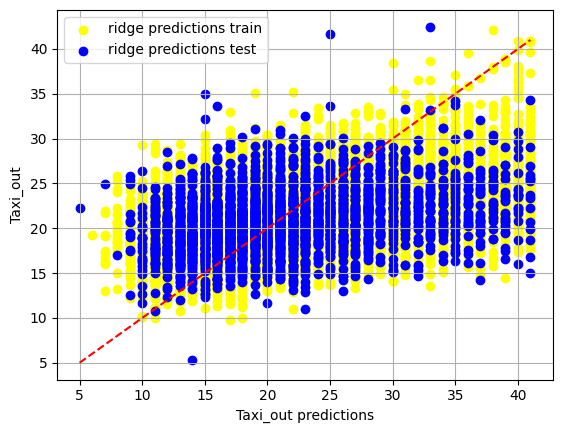

In [9]:


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error 
import warnings

warnings.filterwarnings("ignore")
data = pd.read_csv('M1_final.csv')
data.head()

# Assuming data is your DataFrame containing the dataset
numeric_data = data.select_dtypes(include=['number']).drop(columns=['TAXI_OUT'])  # Select numeric columns only

non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# One-hot encode non-numeric columns
non_numeric_encoded = pd.get_dummies(data[non_numeric_columns], dtype=int)

# Standardize numeric columns
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Concatenate one-hot encoded non-numeric columns with numeric columns
x = pd.concat([non_numeric_encoded, pd.DataFrame(numeric_data_scaled, columns=numeric_data.columns)], axis=1)
y = data['TAXI_OUT']  # Target

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

# Model Initialization
model_lasso = Lasso(alpha=0.01)
model_ridge = Ridge(alpha=0.01)

# Fit the models
model_lasso.fit(x_train, y_train)
model_ridge.fit(x_train, y_train)

# Cross-validation
lasso_cv_scores = cross_val_score(model_lasso, x, y, cv=5, scoring='r2')
ridge_cv_scores = cross_val_score(model_ridge, x, y, cv=5, scoring='r2')

# Prediction
prediction_lasso_train = model_lasso.predict(x_train)
prediction_lasso_test = model_lasso.predict(x_test)
prediction_ridge_train = model_ridge.predict(x_train)
prediction_ridge_test = model_ridge.predict(x_test)

# Evaluation Metrics
lasso_train_mae = mean_absolute_error(y_train, prediction_lasso_train)
lasso_train_mse = mean_squared_error(y_train, prediction_lasso_train)
lasso_train_rmse = mean_squared_error(y_train, prediction_lasso_train, squared=False)
lasso_train_r2 = r2_score(y_train, prediction_lasso_train)

lasso_test_mae = mean_absolute_error(y_test, prediction_lasso_test)
lasso_test_mse = mean_squared_error(y_test, prediction_lasso_test)
lasso_test_rmse = mean_squared_error(y_test, prediction_lasso_test, squared=False)
lasso_test_r2 = r2_score(y_test, prediction_lasso_test)

ridge_train_mae = mean_absolute_error(y_train, prediction_ridge_train)
ridge_train_mse = mean_squared_error(y_train, prediction_ridge_train)
ridge_train_rmse = mean_squared_error(y_train, prediction_ridge_train, squared=False)
ridge_train_r2 = r2_score(y_train, prediction_ridge_train)

ridge_test_mae = mean_absolute_error(y_test, prediction_ridge_test)
ridge_test_mse = mean_squared_error(y_test, prediction_ridge_test)
ridge_test_rmse = mean_squared_error(y_test, prediction_ridge_test, squared=False)
ridge_test_r2 = r2_score(y_test, prediction_ridge_test)

# Print Evaluation Metrics
print("Lasso Train Metrics:")
print(f"MAE: {lasso_train_mae:.2f}")
print(f"MSE: {lasso_train_mse:.2f}")
print(f"RMSE: {lasso_train_rmse:.2f}")
print(f"R2 Score: {lasso_train_r2:.2f}")
print("\nLasso Test Metrics:")
print(f"MAE: {lasso_test_mae:.2f}")
print(f"MSE: {lasso_test_mse:.2f}")
print(f"RMSE: {lasso_test_rmse:.2f}")
print(f"R2 Score: {lasso_test_r2:.2f}")
print("\nRidge Train Metrics:")
print(f"MAE: {ridge_train_mae:.2f}")
print(f"MSE: {ridge_train_mse:.2f}")
print(f"RMSE: {ridge_train_rmse:.2f}")
print(f"R2 Score: {ridge_train_r2:.2f}")
print("\nRidge Test Metrics:")
print(f"MAE: {ridge_test_mae:.2f}")
print(f"MSE: {ridge_test_mse:.2f}")
print(f"RMSE: {ridge_test_rmse:.2f}")
print(f"RMSE: {ridge_test_r2:.2f}")
print(f"RidgeCV:{ridge_cv_scores}")
print(f"LassoCV:{lasso_cv_scores}")

plt.scatter(y_train, prediction_lasso_train, color = 'yellow', label = 'lasso predictions train')
plt.scatter(y_test, prediction_lasso_test, color = 'blue', label = 'lasso predictions test')
plt.xlabel('Taxi_out predictions')
plt.ylabel('Taxi_out')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

#Visualisation for ridge plot
plt.scatter(y_train, prediction_ridge_train, color = 'yellow', label = 'ridge predictions train')
plt.scatter(y_test, prediction_ridge_test, color = 'blue', label = 'ridge predictions test')
plt.legend()
plt.grid(True)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Taxi_out predictions')
plt.ylabel('Taxi_out')
plt.show()


